<a href="https://colab.research.google.com/github/appsstuff/GoldPricePredictionDS/blob/main/Gold_price_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

# Data visualization
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Data learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
investingDS_source = pd.read_csv('gold-price-commodites2024.csv')


In [3]:
# print first 5 rows in the dataframe
investingDS_source.head()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
0,04/30/2024,2333.45,63499.0,1.07,82.41,86.98,2.06,4.66,26.95
1,04/29/2024,2357.70,63960.0,1.07,82.63,87.31,2.03,4.68,27.66
2,04/28/2024,2347.45,63226.0,1.07,83.22,87.57,1.95,4.59,27.50
3,04/26/2024,2335.00,63874.0,1.07,83.85,89.50,1.61,4.57,27.40
4,04/25/2024,2330.30,64555.0,1.07,83.57,89.01,1.64,4.53,27.50


In [4]:
# print last 5 rows of the dataframe
investingDS_source.tail()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
2588,05/06/2014,1308.6,430.0,1.39,99.50,107.06,4.80,3.06,19.65
2589,05/05/2014,1309.3,427.0,1.39,99.48,107.72,4.69,3.05,19.57
2590,05/02/2014,1302.9,453.5,1.39,99.76,108.59,4.67,3.07,19.55
2591,05/01/2014,1283.4,459.0,1.39,99.42,107.76,4.72,3.02,19.04
2592,04/30/2014,1295.9,448.3,1.39,99.74,108.07,4.82,3.03,19.17


In [ ]:
# number of rows and columns
investingDS_source.shape


(2593, 9)

In [ ]:
# getting some basic informations about the data
investingDS_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2593 non-null   object 
 1   gold    2593 non-null   float64
 2   btc     2592 non-null   float64
 3   eur     2587 non-null   float64
 4   coil    2592 non-null   float64
 5   boil    2581 non-null   float64
 6   gas     2592 non-null   float64
 7   copper  2566 non-null   float64
 8   sliver  2576 non-null   float64
dtypes: float64(8), object(1)
memory usage: 182.4+ KB


In [5]:
# checking the number of missing values
# Fill null values with a constant

investingDS_source['Date']     = pd.to_datetime(investingDS_source['Date'])
investingDS_source = investingDS_source.fillna(0)
investingDS_source.isnull().sum()



Date      0
gold      0
btc       0
eur       0
coil      0
boil      0
gas       0
copper    0
sliver    0
dtype: int64

In [6]:
# getting the statistical measures of the data
investingDS_source.describe()

,Date,gold,btc,eur,coil,boil,gas,copper,sliver
count,2593,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000
mean,2019-05-05 09:26:26.887774720,1524.063768,15481.965870,1.131404,63.124828,67.310995,3.227127,3.121759,19.219927
min,2014-04-30 00:00:00,1049.600000,0.000000,0.000000,-37.630000,0.000000,0.000000,0.000000,0.000000
25%,2016-10-31 00:00:00,1250.300000,707.800000,1.090000,48.620000,51.740000,2.500000,2.620000,16.220000
50%,2019-05-08 00:00:00,1349.900000,8211.200000,1.120000,59.700000,65.210000,2.820000,2.980000,17.800000
75%,2021-11-09 00:00:00,1818.700000,26264.000000,1.170000,75.890000,80.780000,3.420000,3.760000,23.060000
max,2024-04-30 00:00:00,2401.400000,72974.000000,1.390000,123.700000,127.980000,9.650000,4.940000,29.420000
std,NaN,317.515461,17701.123874,0.089052,19.599628,20.537941,1.406787,0.784194,4.224792


In [7]:
# Data Normalization : Data normalization involves adjusting measurement values of different scales to a common scale between all columns
# Apply Single Feature Scaling :  transforms each value in a column into a number between 0 and 1


from sklearn.preprocessing import StandardScaler

investingDS = investingDS_source
features_scale = ['gold',	'btc',	'eur'	,'coil',	'boil'	,'gas',	'copper'	,'sliver']

# ِExample for Standard Scaler: investingDS['gold'] = investingDS['gold'] / investingDS['gold'].max()
# create a StandardScaler object
scaler = StandardScaler(copy=True)

# fit and transform the data
scaled_data = scaler.fit(investingDS[features_scale])

# create a new DataFrame with the scaled data
investingDS[features_scale] = scaler.transform(investingDS[features_scale])
investingDS.head()



,Date,gold,btc,eur,coil,boil,gas,copper,sliver
0,2024-04-30,2.549616,2.713178,-0.689663,0.984146,0.957876,-0.829800,1.961935,1.830046
1,2024-04-29,2.626004,2.739226,-0.689663,0.995373,0.973947,-0.851129,1.987443,1.998134
2,2024-04-28,2.593716,2.697752,-0.689663,1.025481,0.986609,-0.908008,1.872654,1.960255
3,2024-04-26,2.554498,2.734367,-0.689663,1.057631,1.080599,-1.149740,1.847145,1.936581
4,2024-04-25,2.539693,2.772847,-0.689663,1.043342,1.056736,-1.128410,1.796127,1.960255


In [8]:
#Create index  for InvestingDS
investingDS.set_index('Date', inplace=True)
investingDS.index



DatetimeIndex(['2024-04-30', '2024-04-29', '2024-04-28', '2024-04-26',
               '2024-04-25', '2024-04-24', '2024-04-23', '2024-04-22',
               '2024-04-19', '2024-04-18',
               ...
               '2014-05-13', '2014-05-12', '2014-05-09', '2014-05-08',
               '2014-05-07', '2014-05-06', '2014-05-05', '2014-05-02',
               '2014-05-01', '2014-04-30'],
              dtype='datetime64[ns]', name='Date', length=2593, freq=None)

In [9]:
# DEFINE VARIABLES
GOLD   = investingDS['gold']
SILVER = investingDS['sliver']
COPPER = investingDS['copper']
EUR    = investingDS['eur']
BCOIN  = investingDS['btc']
COIL  = investingDS['coil']
BOIL   = investingDS['boil']
GAS    = investingDS['gas']


<Axes: xlabel='Date'>

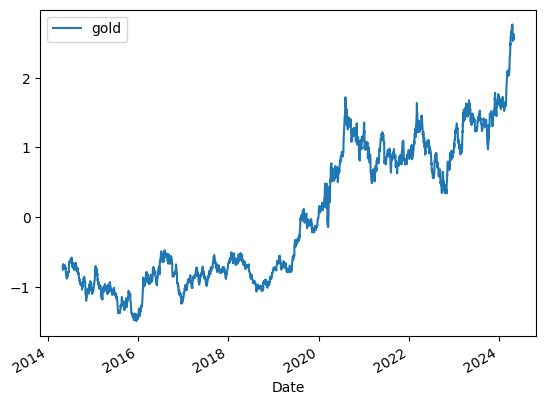

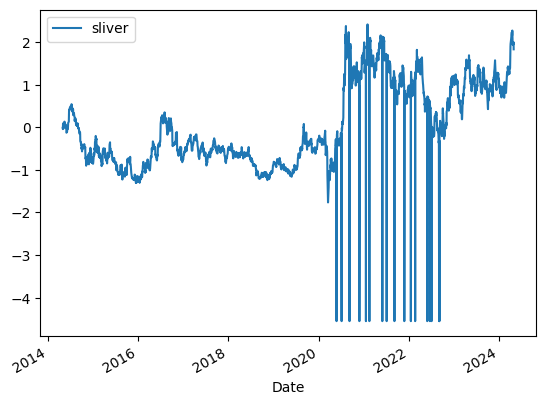

In [ ]:
investingDS.plot.line(y="gold",use_index=True)
investingDS.plot.line(y="sliver",use_index=True)


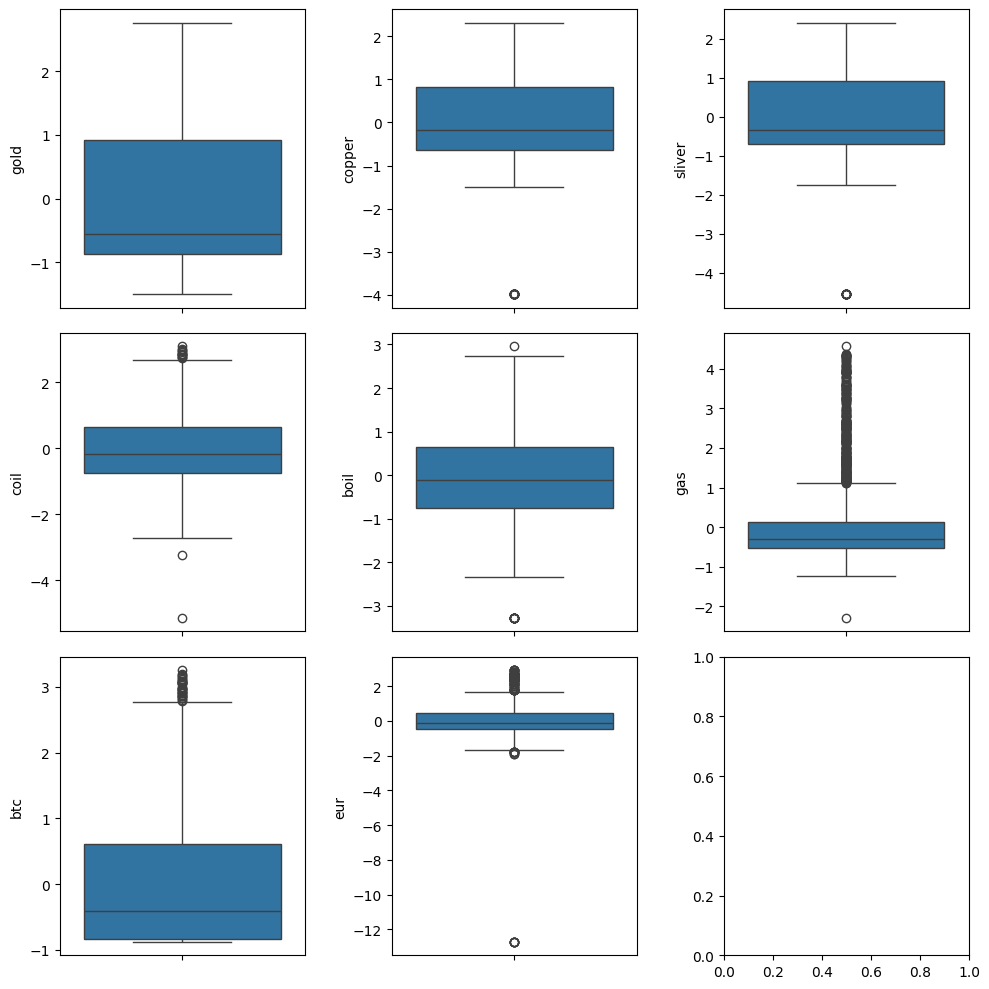

In [10]:
'''
Detect Outliers
Outliers are extreme values that fall a long way outside of the other observations.
Created the separate function to detect outliers for the dataset. Here used the boxplot using Seaborn library
'''

def detectOutliers():
    fig, axs = plt.subplots(3,3, figsize = (10,10))
    plt1 = sns.boxplot(GOLD,   ax = axs[0,0])
    plt2 = sns.boxplot(COPPER, ax = axs[0,1])
    plt3 = sns.boxplot(SILVER, ax = axs[0,2])

    plt1 = sns.boxplot(COIL,   ax = axs[1,0])
    plt2 = sns.boxplot(BOIL,   ax = axs[1,1])
    plt3 = sns.boxplot(GAS,    ax = axs[1,2])

    plt1 = sns.boxplot(BCOIN,    ax = axs[2,0])
    plt2 = sns.boxplot(EUR,    ax = axs[2,1])
    plt.tight_layout()
detectOutliers()


Correlation:
1. Positive Correlation
2. Negative Correlation

In [11]:
correlation = investingDS.corr()

<Axes: >

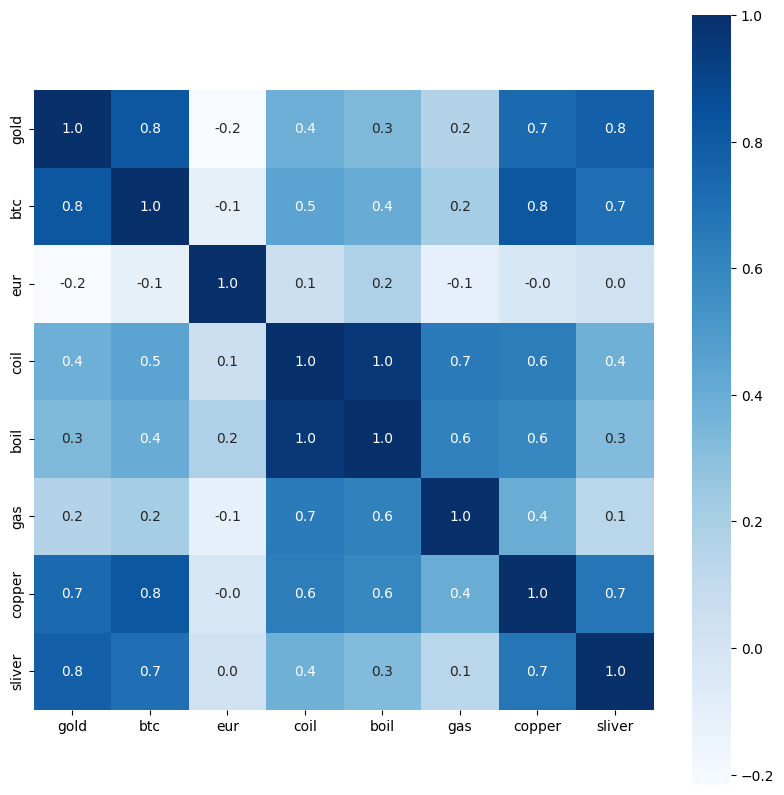

In [ ]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['gold'])

gold      1.000000
btc       0.815529
eur      -0.216210
coil      0.386263
boil      0.332238
gas       0.156357
copper    0.732529
sliver    0.776556
Name: gold, dtype: float64


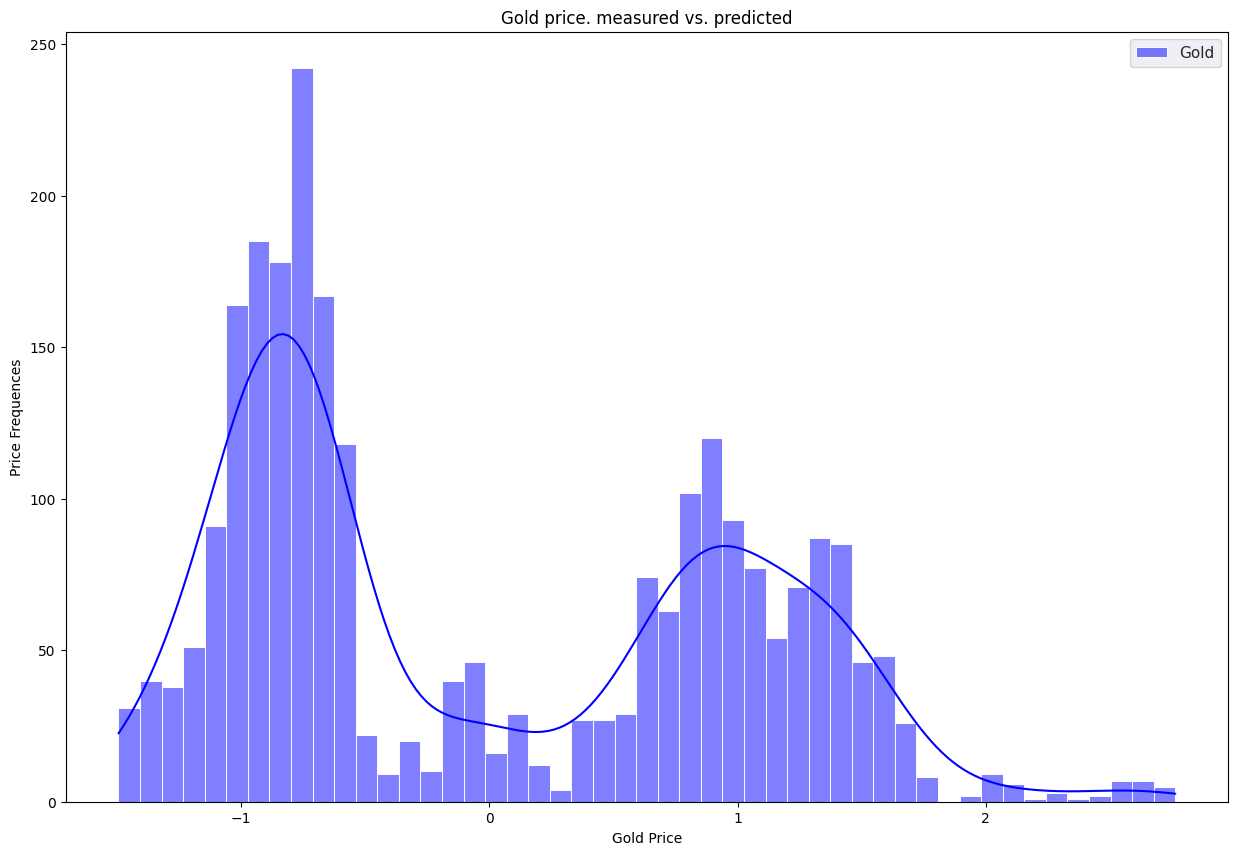

In [12]:
# checking the distribution of the GLD Price
plt.style.use('tableau-colorblind10')
plt.title('Gold price. measured vs. predicted')
sns.set_theme()
binsLength = int(len(investingDS)/52)
ax = sns.histplot(data= investingDS['gold'], bins=binsLength , kde=True, color='Blue', label='Gold')

ax.set(xlabel="Gold Price")
ax.set(ylabel="Price Frequences")
ax.set_axisbelow(True)
ax.figure.set_size_inches(15, 10)

# sns.histplot(x1 , bins=60,  color='red', kde=True, label='pred')
# sns.histplot(y1 , bins=60,  color='Blue', kde=True, label='measured')
plt.legend()

Splitting the Features and Target

Splitting into Training data and Test Data

# Use train_test_split Model
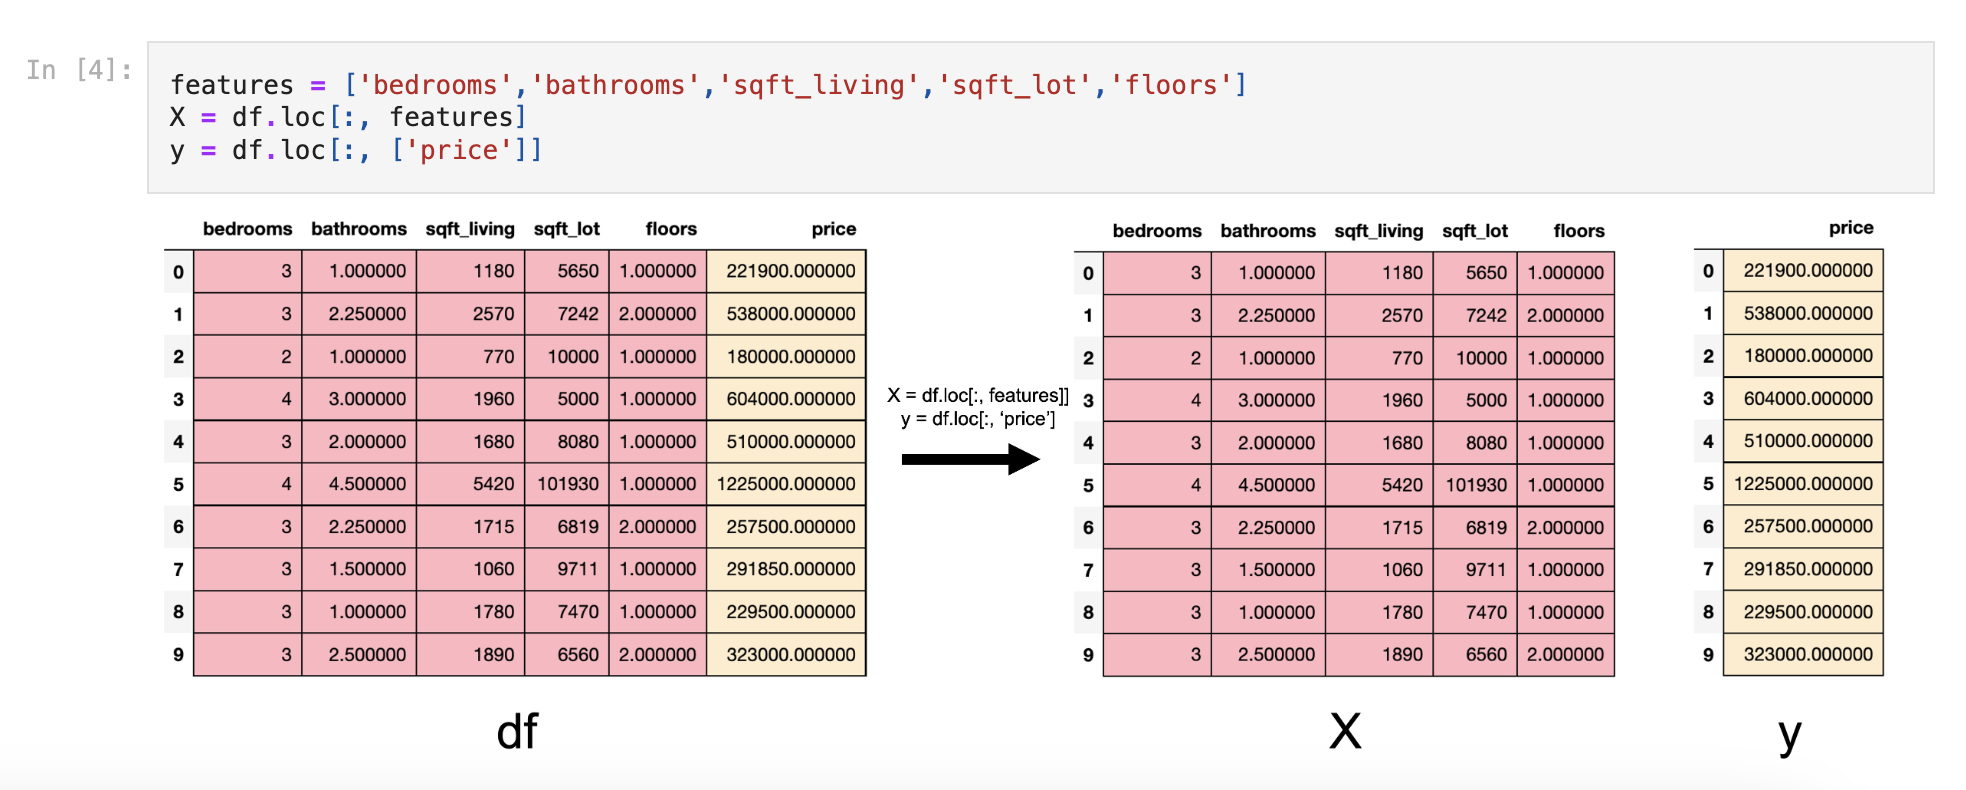

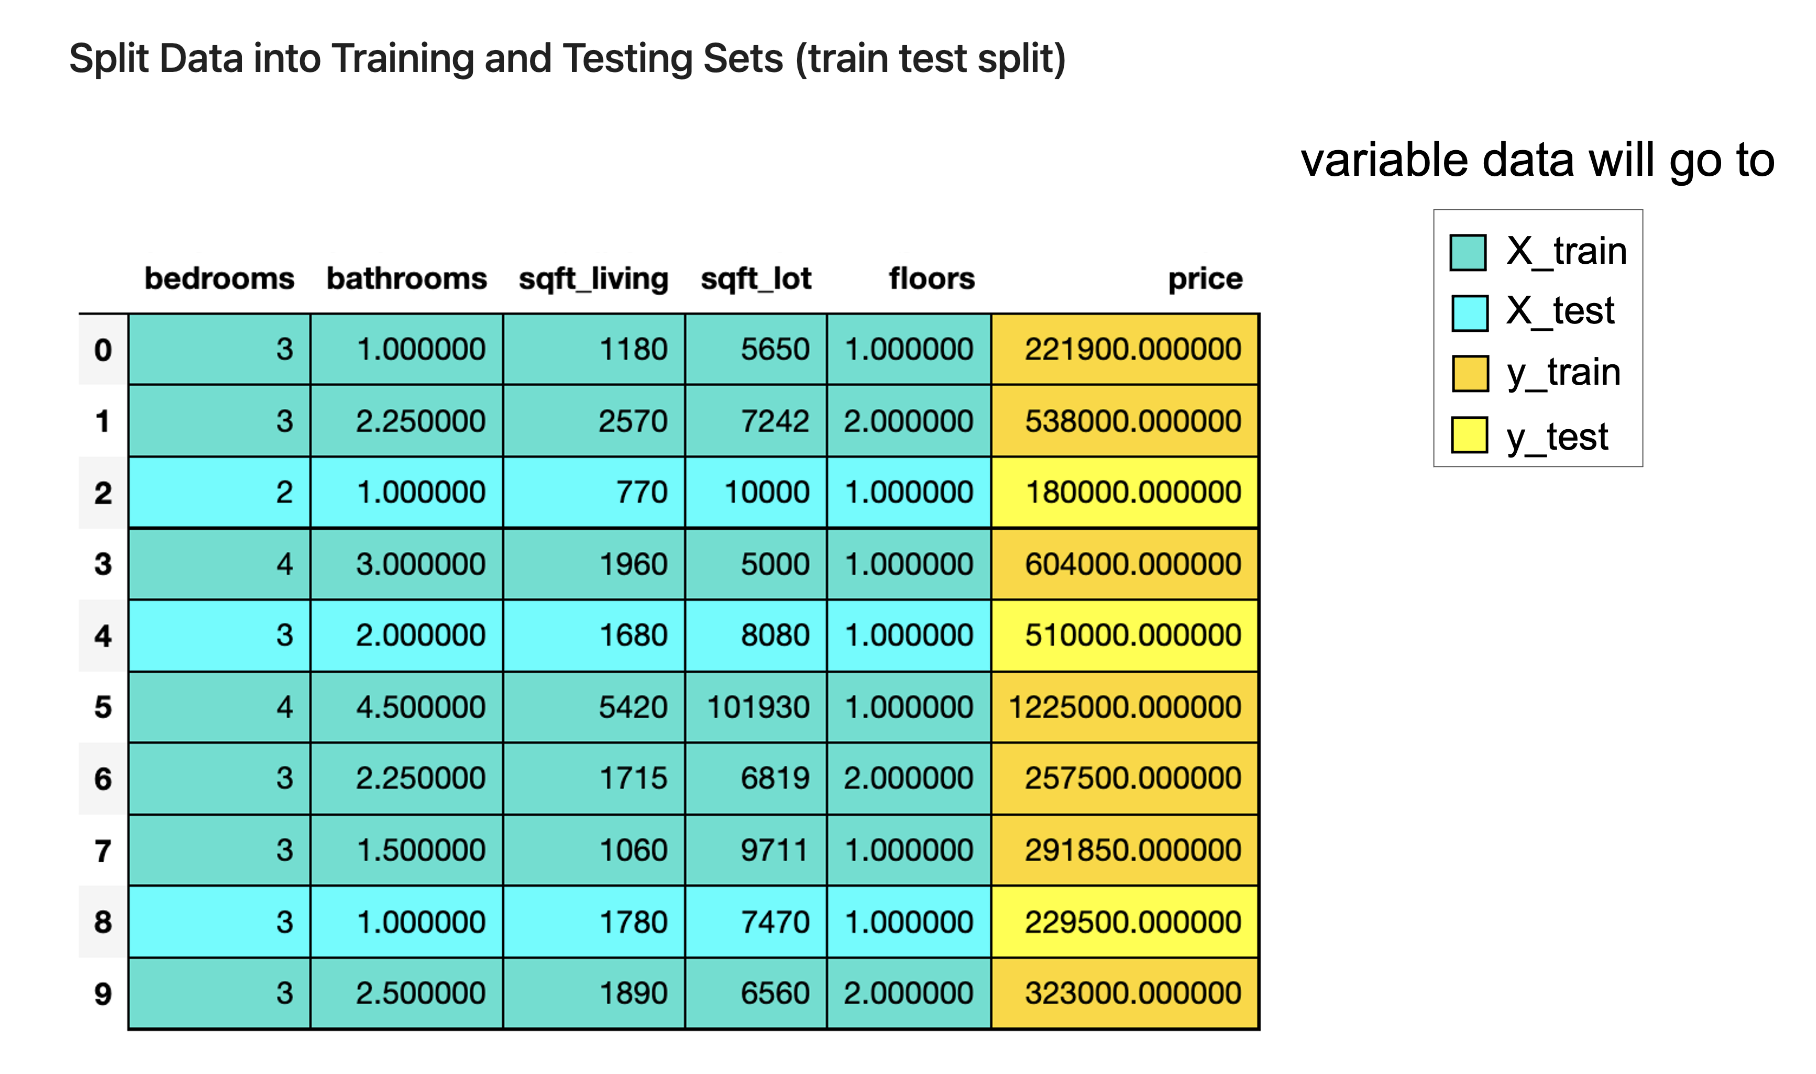

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



features  = ['btc',	'eur'	,'coil',	'boil'	,'gas',	'copper'	,'sliver']
target    = ['gold']
xFeatuers = investingDS.loc[:, features]
yTarget   = investingDS.loc[:, target]

X_train, X_test, Y_train, Y_test = train_test_split(xFeatuers , yTarget, test_size = 0.30, random_state=0)


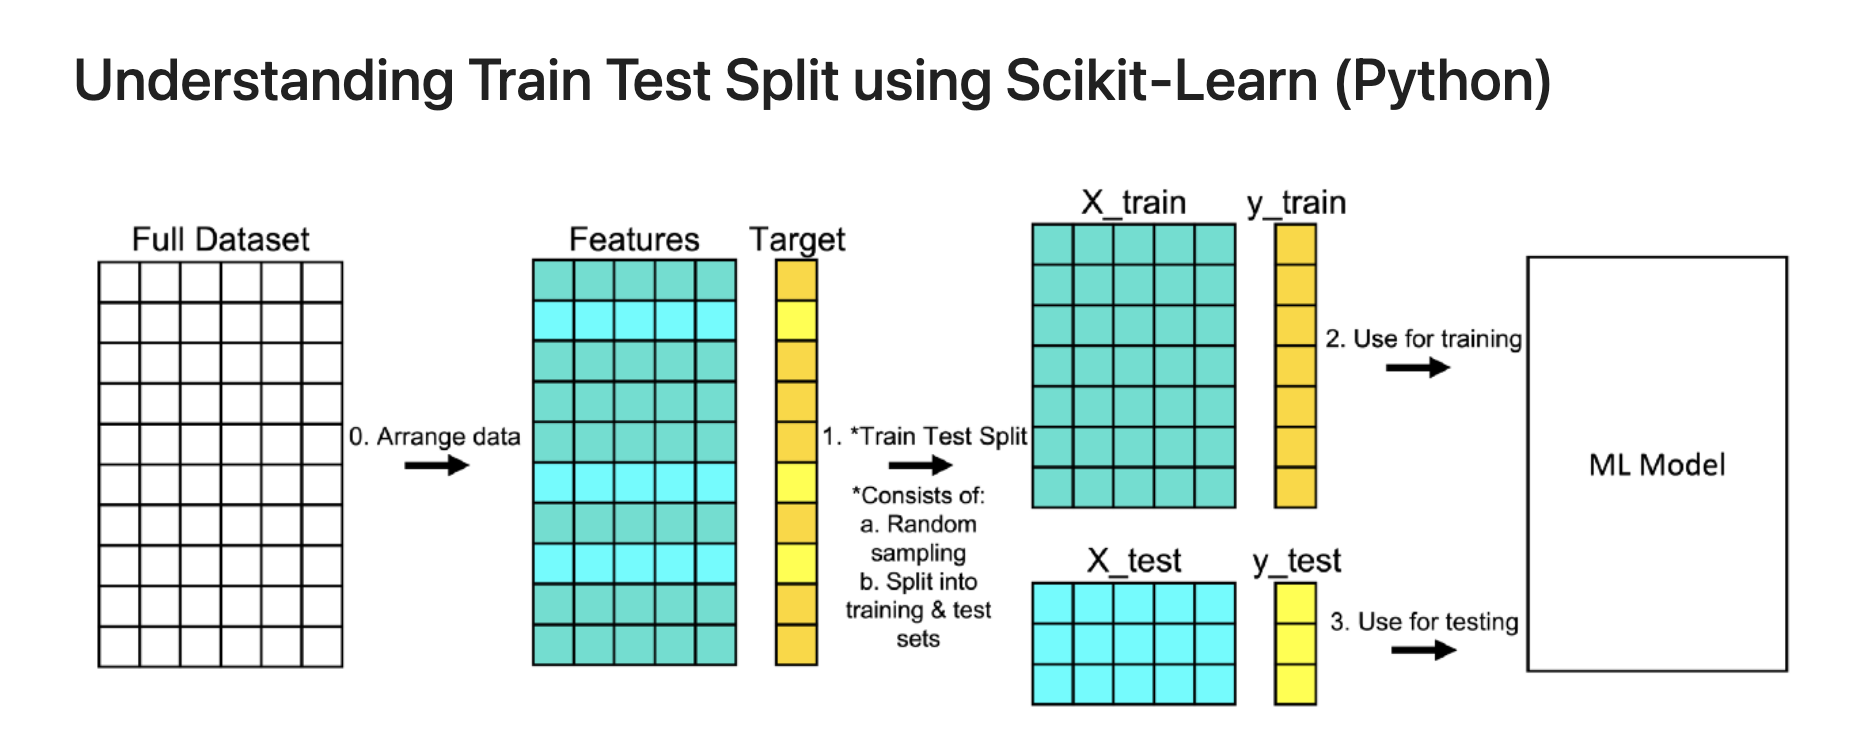

Model Training:

> Add blockquote


Random Forest Regressor

In [14]:
def plotPrediction(predict, label , score, target):
  label = label + " , Score: " + str(score )

  plt.scatter(Y_test[target].values, Y_test, color = 'red')
  plt.scatter(Y_test[target].values, predict, color = 'blue')
  plt.title(label)
  plt.xlabel('Price')
  plt.ylabel('Prediction')
  plt.legend
  plt.show()

In [29]:
def printResult(prediction, Y_test , accuracy):

  # Calculate the mean squared error (MSE)
  mse = mean_squared_error(Y_test, prediction)

  # Calculate the root mean squared error (RMSE)
  rmse = np.sqrt(mse)

  # Print the RMSE
  print("RMSE:", rmse)

  # Calculate the Mean Absolute Error (MAE)
  mae = mean_absolute_error(Y_test, prediction)

  # Print the MAE
  print("MAE:", mae)

  # Calculate the R-squared score
  r2 = r2_score(Y_test, prediction)

  # Print the R-squared score
  print("R-squared:", r2)

  print("Accuracy:", accuracy)

<ipython-input-35-1ecc1ff8e2fe>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest_regressor.fit(X_train,Y_train)


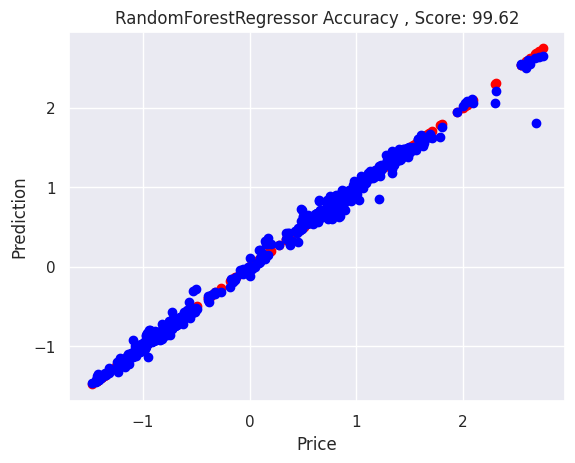

RMSE: 0.06214354507241459
MAE: 0.03671465699530108
R-squared: 0.9962039972517518
Accuracy: 99.62


In [35]:
#User RandomForestRegressor # training the model
randomForest_regressor = RandomForestRegressor(n_estimators=250,random_state = 0)
randomForest_regressor.fit(X_train,Y_train)

# prediction on Test Data
prediction = randomForest_regressor.predict(X_test)


# R squared error
error_score = metrics.r2_score(Y_test, prediction)
accuracy =round(error_score, 4)*100
plotPrediction(prediction, 'RandomForestRegressor Accuracy' ,accuracy, 'gold')
printResult(prediction, Y_test , accuracy)



Model Evaluation

Compare the Actual Values and Predicted Values in a Plot

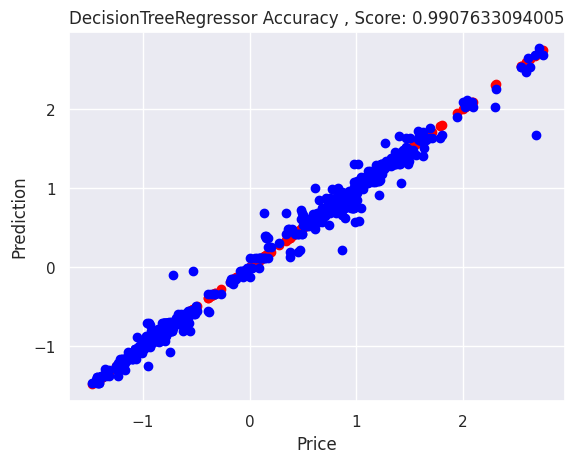

RMSE: 0.09693730994797477
MAE: 0.055327641560476246
R-squared: 0.9907633094005
Accuracy: 0.9907633094005


In [34]:
# Import the Model You Want to Use. DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report

#Make An Instance of the Model
decisionTreeRegressor_predictor = DecisionTreeRegressor(max_depth = 10, random_state = 0)

# Train the Model on the Data
decisionTreeRegressor_predictor.fit(X_train, Y_train)

#4. Predict Labels of Unseen Test Data
prediction = decisionTreeRegressor_predictor.predict(X_test)

#Measuring Train Test Split Model Performance
accuracy = decisionTreeRegressor_predictor.score(X_test, Y_test)

# R squared error
score =round(accuracy, 4)*100
plotPrediction(prediction, 'DecisionTreeRegressor Accuracy' ,accuracy , 'gold')
printResult(prediction, Y_test , accuracy)




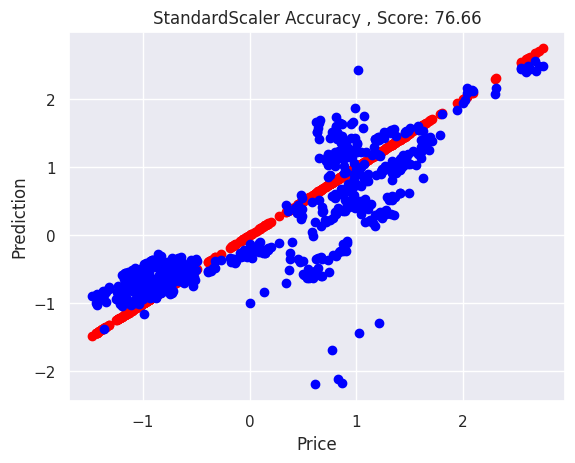

RMSE: 0.48728172538330156
MAE: 0.34948743986061864
R-squared: 0.7666032966560672
Accuracy: 76.66


In [33]:
#. StandardScaler Model
sc = StandardScaler()
X_sc_train  = sc.fit_transform(X_train)
X_sc_test   = sc.transform(X_test)


# Build the LinearRegression model
liner_regressor = LinearRegression()
liner_regressor.fit(X_sc_train, Y_train)

# Make predictions
prediction = liner_regressor.predict(X_sc_test)

error_score = metrics.r2_score(Y_test, prediction)

# R squared error
accuracy =round(error_score, 4)*100
plotPrediction(prediction, 'StandardScaler Accuracy' ,accuracy , 'gold')
printResult(prediction, Y_test , accuracy)



In [ ]:
#Use Yahoo Financial Gold Historical data Dataset

yahoofince_ds = pd.read_csv('YahooDS.csv')
yahoofince_ds.head()
yahoofince_ds.shape


yahoofince_ds = yahoofince_ds.fillna(0)
yahoofince_ds.isnull().sum()

#Create index  for yahooDS
yahoofince_ds.set_index('Date', inplace=True)
yahoofince_ds.index

# use YahooFinance DS to predect the Tomorrow price
# add two addtional columns and remove unwanted columns ( Tomorrow Price, Target Price)


# del yahoofince_ds['Adj Close']
# del yahoofince_ds['Volume']

#Taret price 1 is grether than yesterday close , 0 is less ، Create new Column for if the price will increase
yahoofince_ds['Tomorrow'] = yahoofince_ds["Close"].shift(-1)
yahoofince_ds['Target']   = (yahoofince_ds['Tomorrow']>yahoofince_ds['Close']).astype(int)
yahoofince_ds.head()


,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2014-04-30,73.120003,73.180000,72.440002,72.720001,56.358982,8734100,73.089996,1
2014-05-01,72.440002,73.279999,72.440002,73.089996,56.645733,7016700,73.860001,1
2014-05-02,72.860001,73.940002,72.430000,73.860001,57.242489,6912000,74.980003,1
2014-05-05,73.750000,75.699997,73.339996,74.980003,58.110516,6211400,74.440002,0
2014-05-06,74.900002,74.989998,74.309998,74.440002,57.692009,4329800,75.900002,1


<Figure size 864x1008 with 0 Axes>

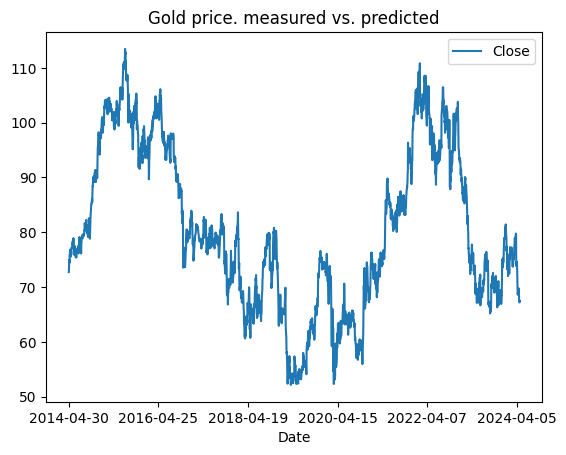

<Figure size 864x1008 with 0 Axes>

In [ ]:
# User #Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features  = ['Open','High','Low','Close','Volume']
target    = ['Target']
yahoofince_ds.plot.line(y="Close", use_index=True)
# checking the distribution of the GLD Price
plt.title('Gold price. measured vs. predicted')
plt.legend()
plt.figure(figsize=(12, 14), dpi=72)



In [ ]:
def predictionFun(xTrain ,yTrain, xTest, yTest,  model):
  model.fit(xTrain, yTrain)
  prediction = model.predict(xTest)
  prediction = pd.Series(prediction , index=yTest.index , name="Prediction")
  compined   = pd.concat([yTest, prediction], axis=1)
  return compined;


In [ ]:
def backtest(data , model , predictors, start=2500 , step=250):
  all_predictions = []

  for i in range(start , data.shape[0], step):
    train = data.iloc[0:i].copy()
    test  = data.iloc[i:(i+step)].copy()
    prediction = predictionFun(train[features] ,train[target],test[features] ,test[target],  model)
    all_predictions.append(prediction)
    return pd.concat(all_predictions)

In [ ]:
from sklearn.metrics import precision_score

X_train, X_test, Y_train, Y_test = train_test_split(yahoofince_ds[features],yahoofince_ds[target], test_size=0.35, random_state=35)
model = RandomForestClassifier(n_estimators=250 , random_state=35)

predictionFun(X_train ,Y_train, X_test, Y_test,  model)
preditionTest = backtest(yahoofince_ds, model ,  features)
preditionTest["Prediction"].value_counts()
precision_score(preditionTest["Target"], preditionTest["Prediction"])



# predictionFun(X_train , Y_train, X_test, Y_test,  model)

# model.fit(X_train, Y_train)
# prediction = model.predict(X_test)

# accuracy = round(accuracy_score(Y_test, prediction) ,4)  * 100
# plotPrediction(prediction, 'RandomForestClassifier Accuracy' ,accuracy , 'Target')

<ipython-input-53-458bceae9f24>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xTrain, yTrain)
<ipython-input-53-458bceae9f24>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xTrain, yTrain)


0.5714285714285714